In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\USER\Desktop\All python programs\archive (3)\data.csv")

In [3]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
df.tail()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True
999,Academic,B,Male,Quiet Interested,Urban,50,2940000,69.1,86.13,True,False


In [5]:
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [6]:
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [7]:
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [8]:
df['gender'].value_counts()

Male      515
Female    485
Name: gender, dtype: int64

In [9]:
df['interest'].value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

In [10]:
df['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [11]:
df["Academic"]=df['type_school']== 'Academic'
df['A']=df['school_accreditation']== 'A'
df['male']=df['gender']== 'male'
df['urban']=df['residence']== 'urban'
df['interested']=['interest']== 'Very Interested '

In [12]:
x=df[['parent_age','parent_salary','house_area','average_grades','Academic','A','male','urban','interested']].values
y=df['in_college'].values

In [13]:
model=LogisticRegression(solver='liblinear')

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [15]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
model.score(x_test,y_test)

0.52

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt=DecisionTreeClassifier()

In [23]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt.score(x_test,y_test)

0.8166666666666667

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf=RandomForestClassifier()

In [19]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rf.score(x_test,y_test)

0.8666666666666667

In [25]:
y_pred=rf.predict(x_test)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


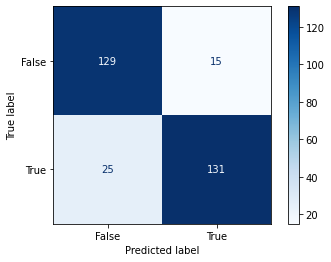

In [29]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(rf,x_test,y_test,cmap=plt.cm.Blues)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[129,  15],
       [ 25, 131]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87       144
        True       0.90      0.84      0.87       156

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

